In [ ]:
##Student Performance Indicator

life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
df=pd.read_csv('data/stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


dataset  information:
gender-(male/female)
race_ethnicity-(group A/B/C/D/E)
parental_level_of_education-(some college,associate's degree ,high school,some high school ,bachelor's degree ,master's degree )
lunch-(standard,free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score


In [16]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Data Checks to perform:
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

In [ ]:
df.isna().sum()
#no NULL values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [19]:
df.duplicated().sum()
#no duplicates

np.int64(0)

In [20]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [29]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']
print(f"There are {len(numerical_feature)} numerical features :{numerical_feature}")
print(f"There are {len(categorical_feature)} categorical features :{categorical_feature}")

There are 3 numerical features :['math_score', 'reading_score', 'writing_score']
There are 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [33]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229


now total_score and avergae are my o/p var

In [34]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229


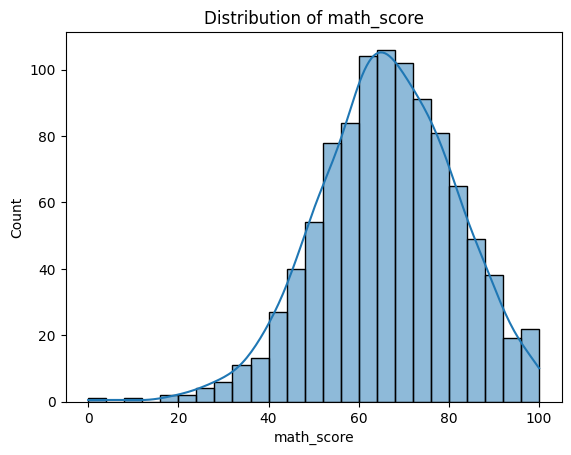

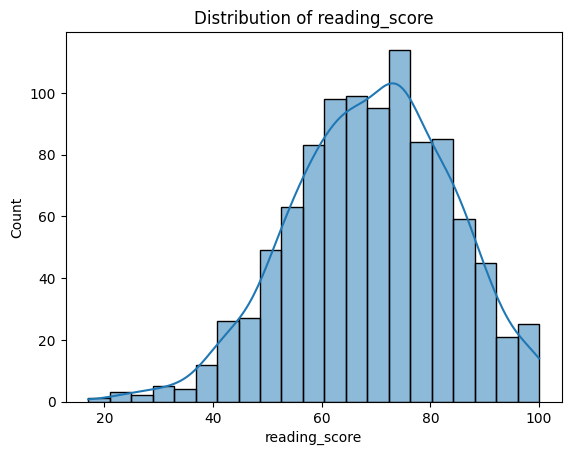

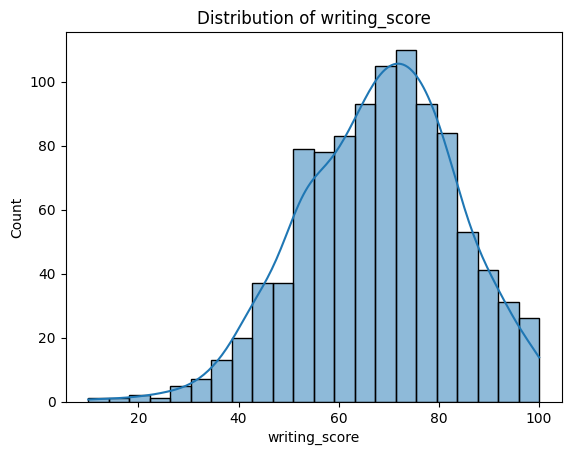

In [ ]:
for col in numerical_feature:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


<Axes: xlabel='average', ylabel='Count'>

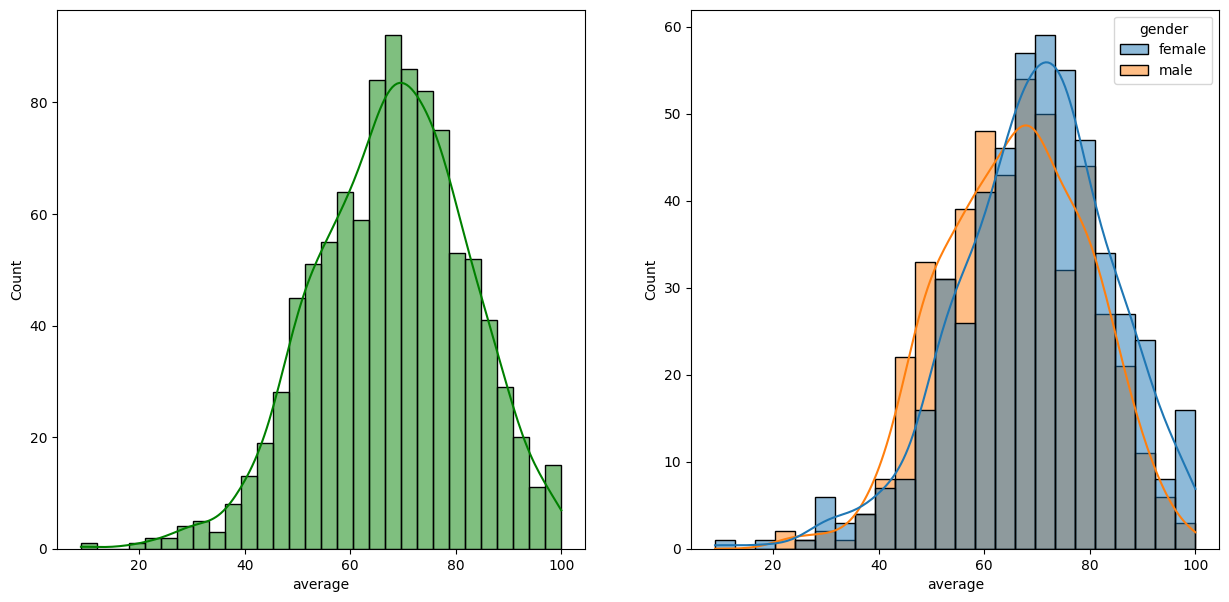

In [45]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

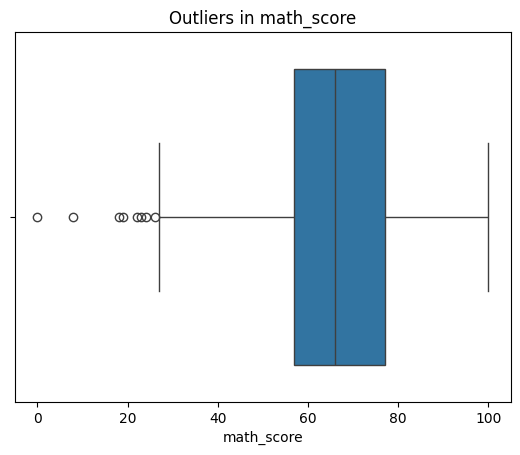

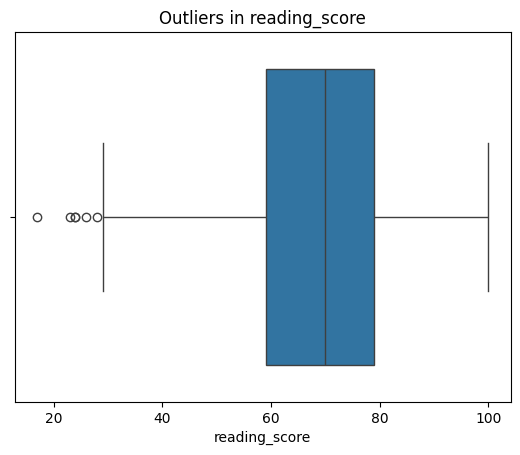

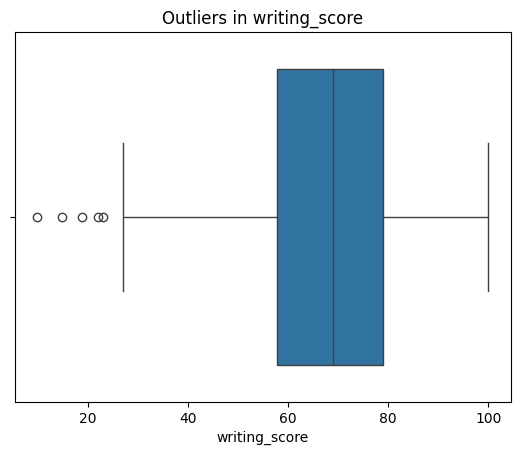

In [46]:
for col in numerical_feature:
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


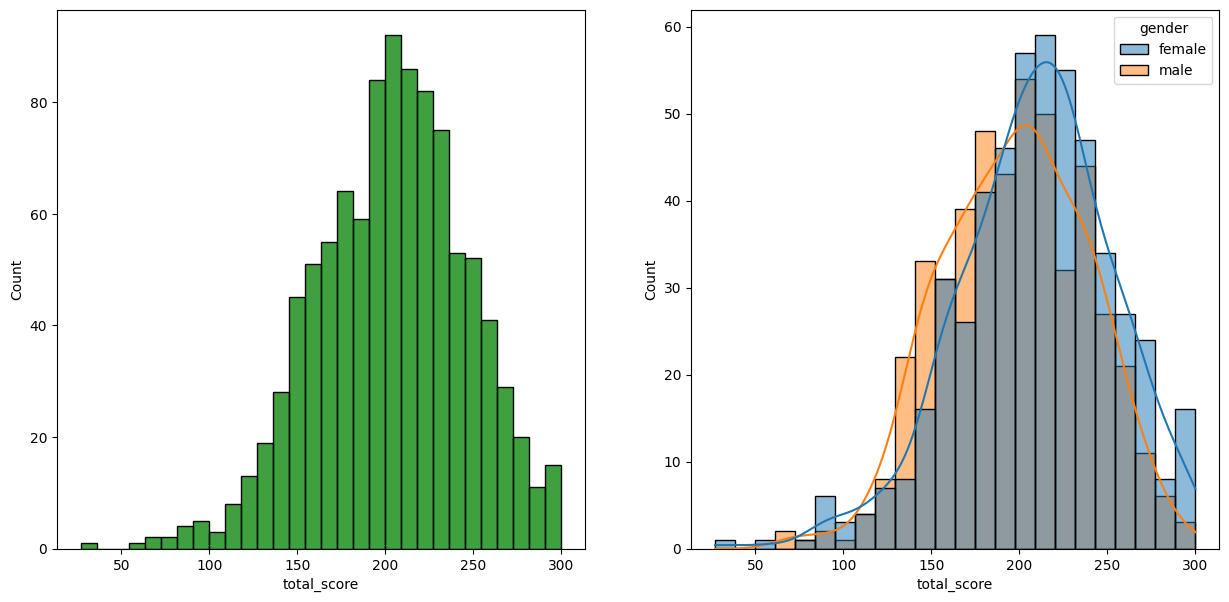

In [48]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.show()

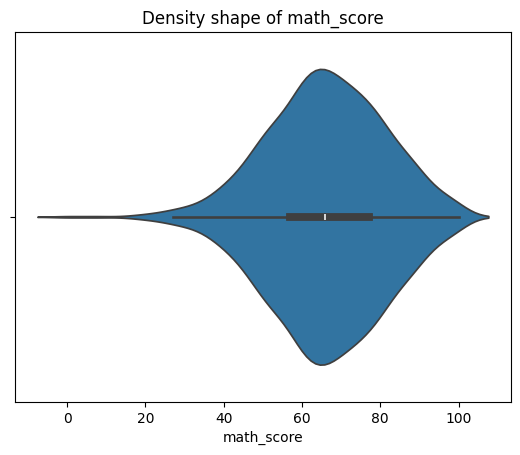

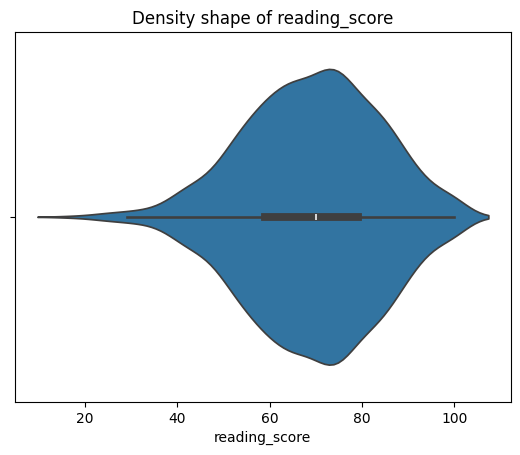

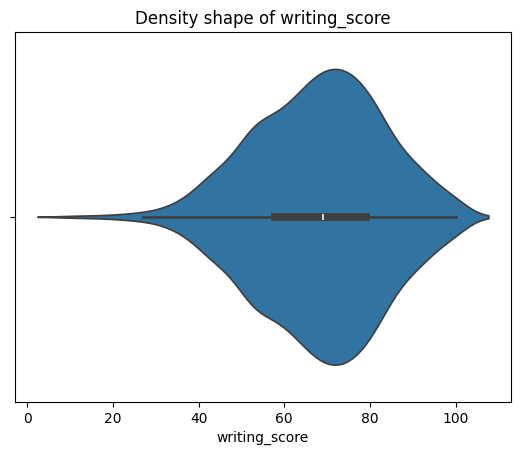

In [49]:
for col in numerical_feature:
    sns.violinplot(x=df[col])
    plt.title(f"Density shape of {col}")
    plt.show()


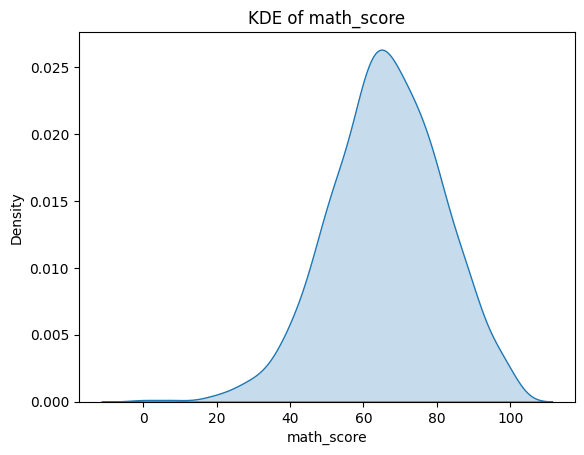

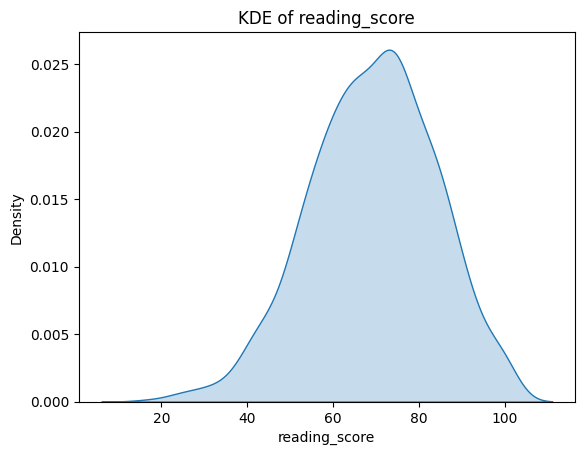

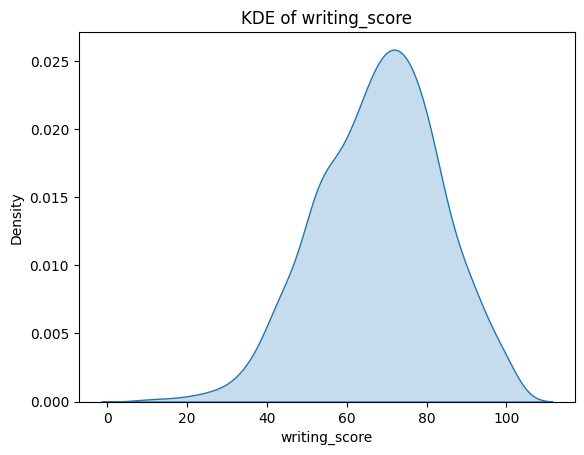

In [53]:
for col in numerical_feature:
    sns.kdeplot(x=df[col],shade=True)
    plt.title(f"KDE of {col}")
    plt.show()


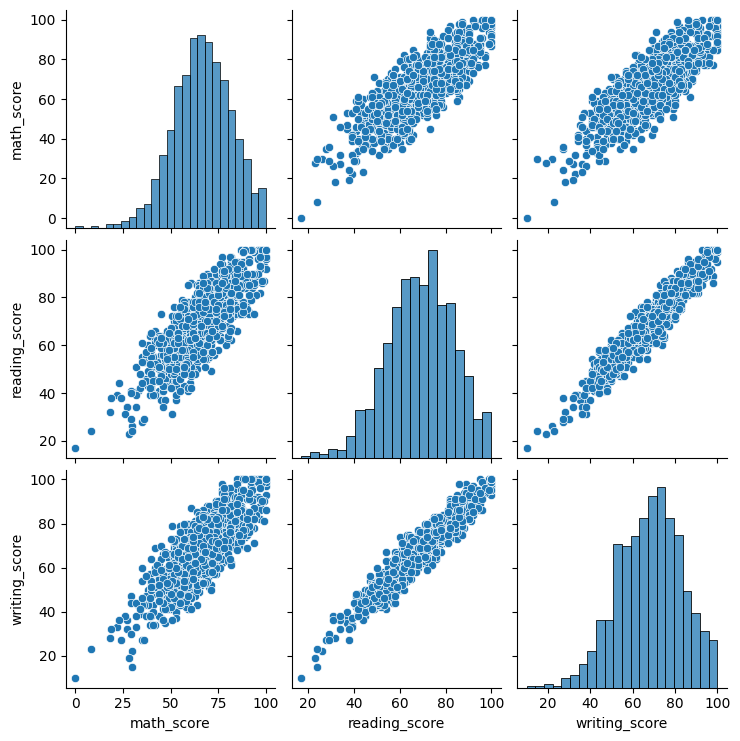

In [56]:
sns.pairplot(df[numerical_feature])
plt.show()


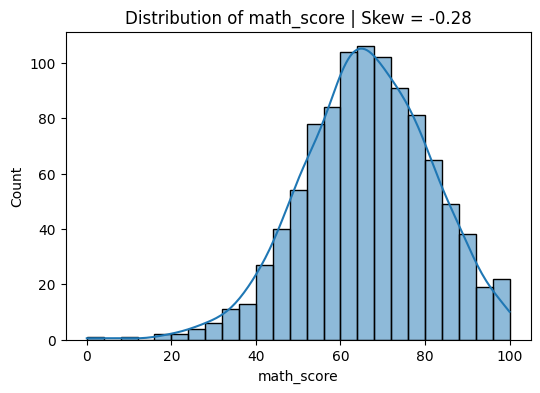

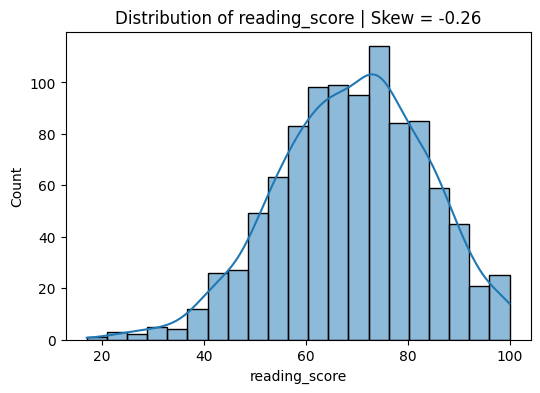

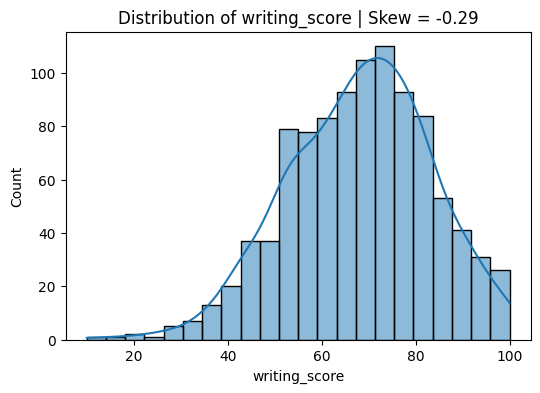

In [60]:
from scipy.stats import skew
for col in numerical_feature:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} | Skew = {round(skew(df[col].dropna()),2)}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


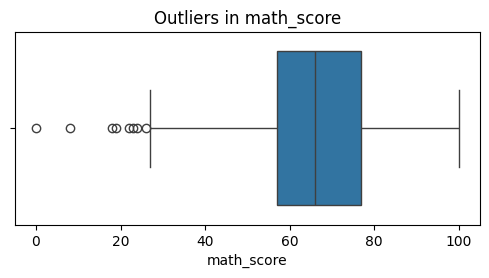

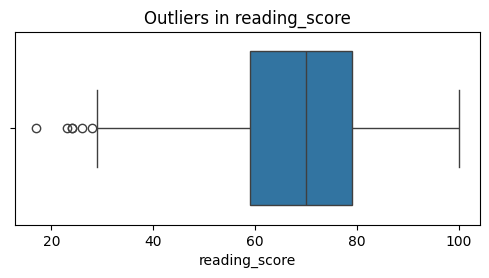

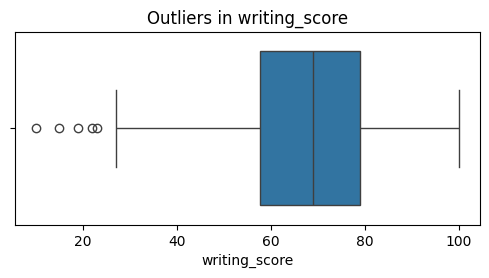

In [62]:
for col in numerical_feature:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()


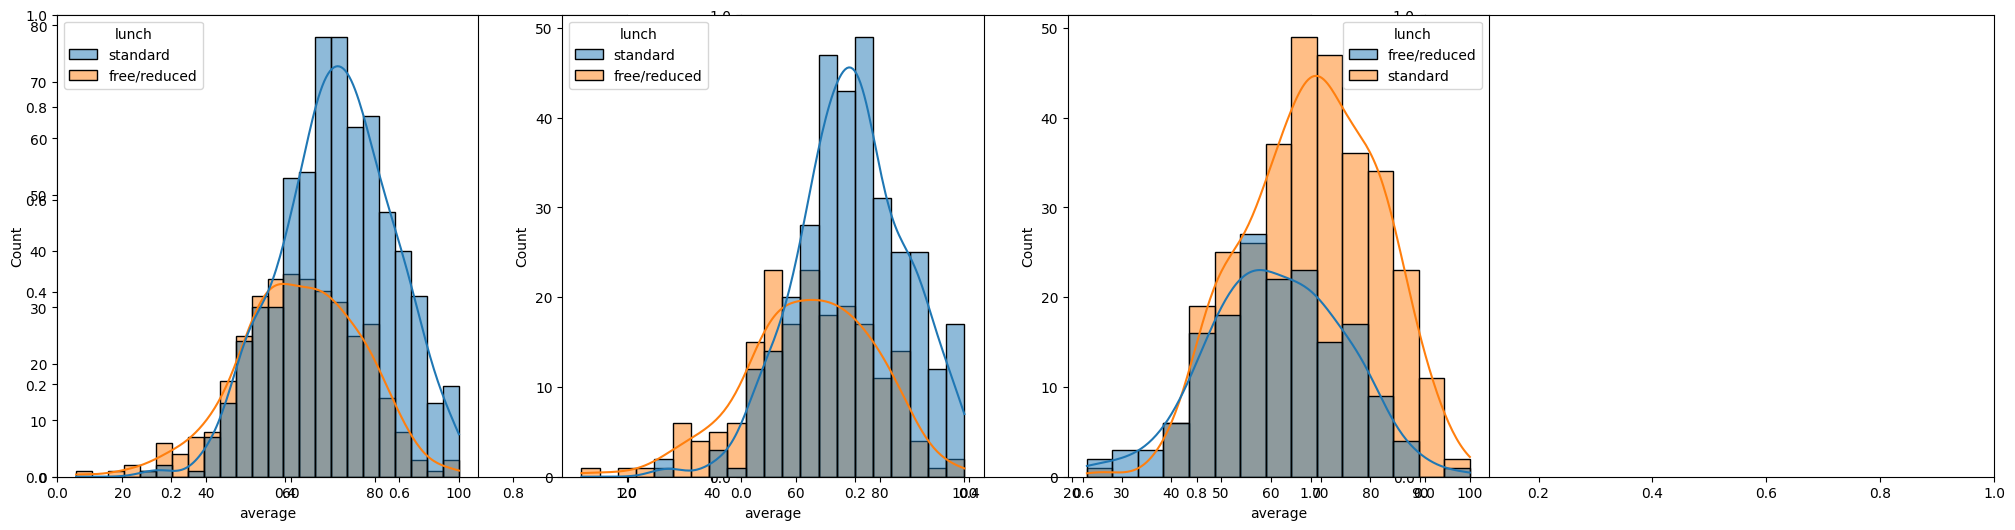

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

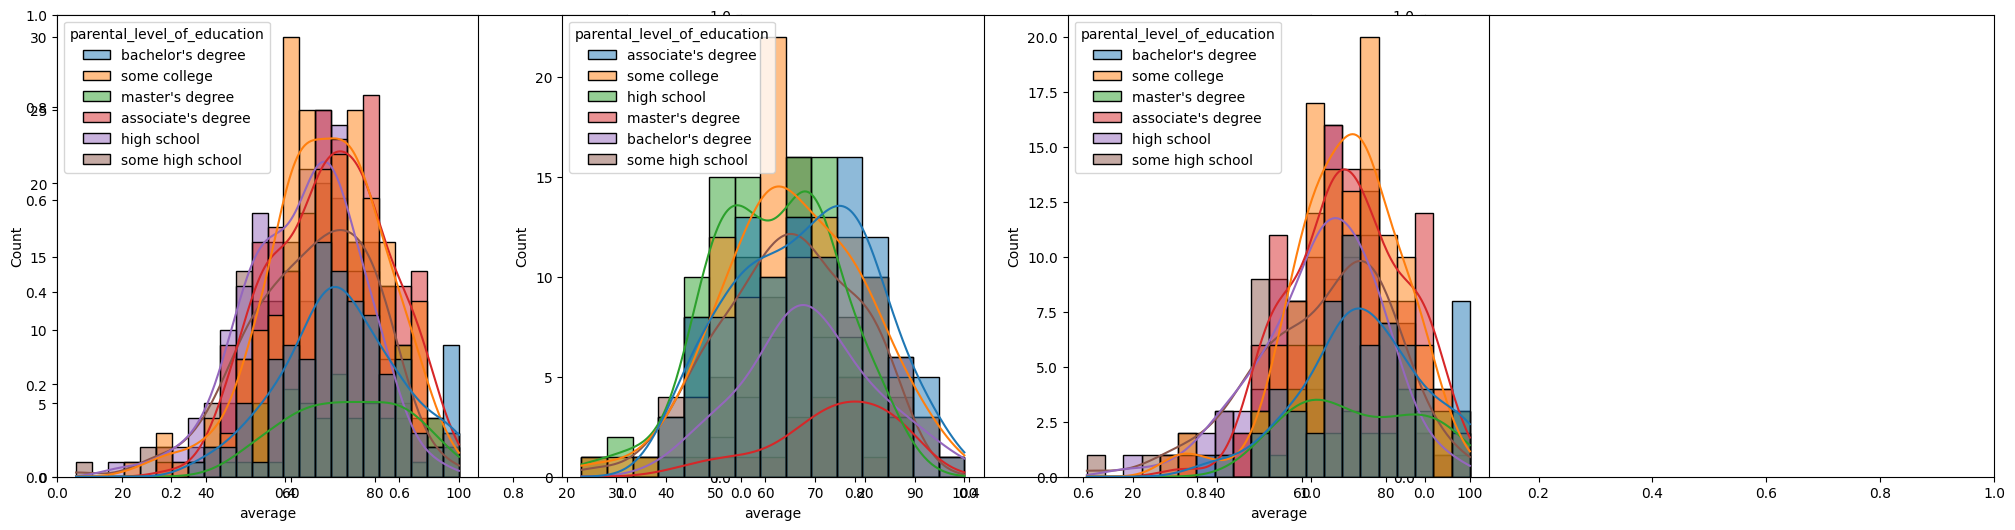

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

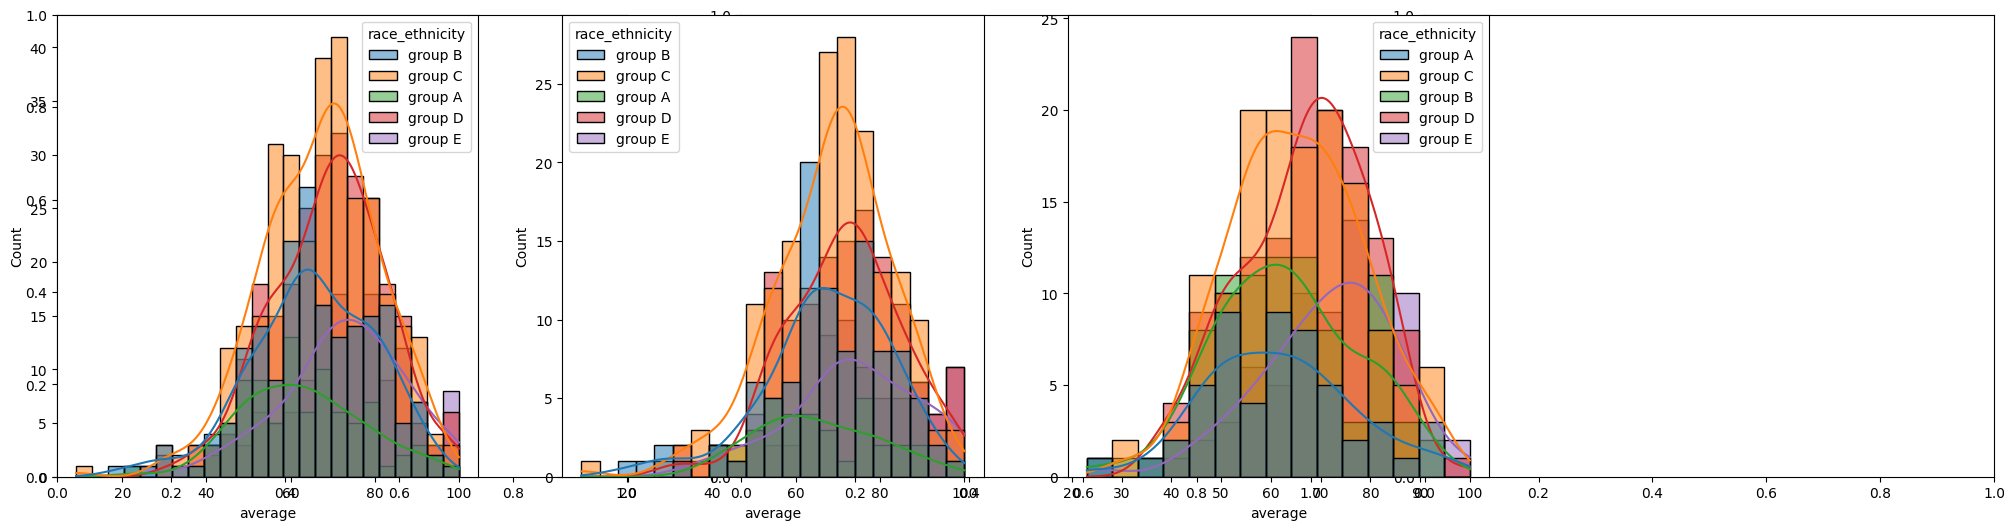

In [68]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

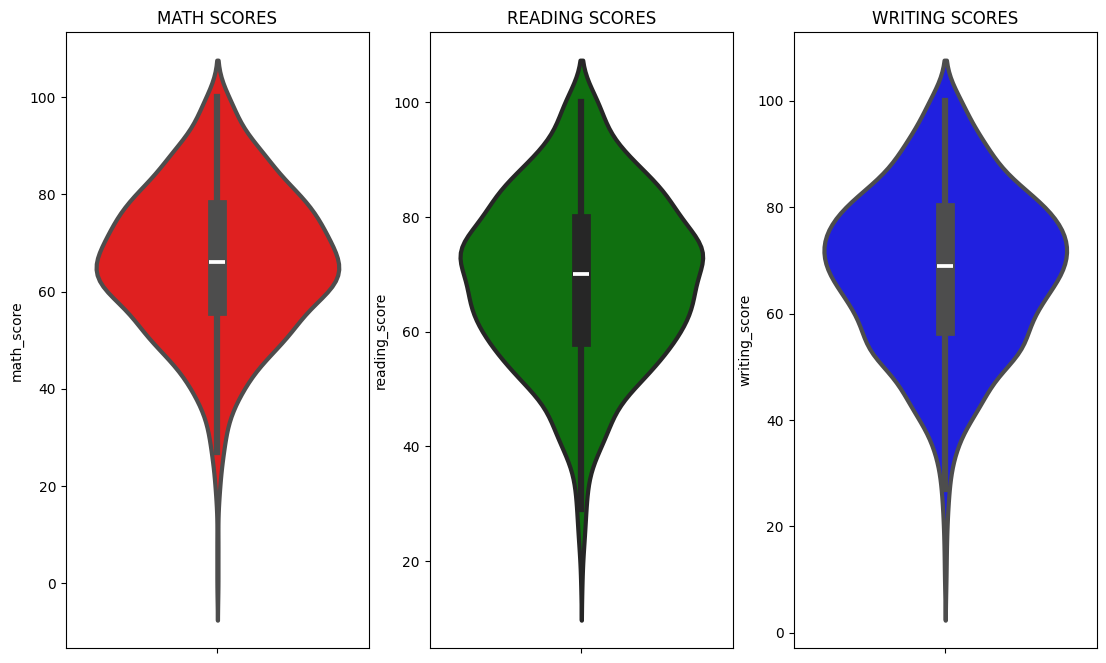

In [70]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()